# BRAIN TUMOR DETECTION AND CLASSIFICATION PREDICTION USING MACHINE LEARNING AND DEEP LEARNING

#Framework setup for computer vision and deep learning tasks.


In [4]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from skimage.transform import resize


In [5]:
import os  # Import the os module

# Define paths
input_directory = r"/Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training/glioma"
output_directory = r"/Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training/glioma"

# Ensure the output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Load images from the directory
def load_images_from_directory(directory):
    images = []
    filenames = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust extensions as needed
            filepath = os.path.join(directory, filename)
            image = cv2.imread(filepath)  # Load image
            if image is not None:
                images.append(image)
                filenames.append(filename)
    return images, filenames

images, filenames = load_images_from_directory(input_directory)

# Applying CLAHE (Contrast Limited Adaptive Histogram Equalization)

CLAHE is used to improve the contrast of an image, especially in cases where the image has poor contrast or uneven illumination. It works better than standard histogram equalization by applying contrast enhancement to small tiles (local regions) of the image, rather than globally, thus preserving fine details.

Clahe

In [6]:
def apply_clahe(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Create CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    
    # Apply CLAHE
    enhanced_image = clahe.apply(gray_image)
    return enhanced_image
def save_images(images, filenames, output_directory):
    for img, filename in zip(images, filenames):
        output_path = os.path.join(output_directory, filename)
        cv2.imwrite(output_path, img)  # Save image
        print(f"Saved processed image: {output_path}")
# Process all images
processed_images = []
for image in images:
    processed_image = apply_clahe(image)  # Apply CLAHE
    processed_images.append(processed_image)

# Save processed images
save_images(processed_images, filenames, output_directory)        

Saved processed image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training/glioma/Tr-gl_1135.jpg
Saved processed image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training/glioma/Tr-gl_0559.jpg
Saved processed image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training/glioma/Tr-gl_1121.jpg
Saved processed image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training/glioma/Tr-gl_0217.jpg
Saved processed image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training/glioma/Tr-gl_1109.jpg
Saved processed image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training/glioma/Tr-gl_0571.jpg
Saved processed image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training/glioma/Tr-gl_0565.jpg
Saved processed image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training/glioma/Tr-gl_0203.jpg
Saved processed image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training/glioma/Tr-glTr_0003.jpg
Saved processed image: /Users/talhaahmadkhan

# NORMALIZATION


Normalization in image processing converts pixel values into a consistent range (usually 0 to 1) to ensure stable and efficient training of machine learning models. It prevents large pixel values from dominating the learning process, helps models converge faster, and improves overall performance. Normalizing images also ensures uniformity across datasets, making the model more robust and efficient during training, especially for tasks like brain tumor detection.

Saved normalized image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training\NormalizedTesting/pituitary/Tr-pi_0505.npy
Saved normalized image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training\NormalizedTesting/pituitary/Tr-pi_0263.npy
Saved normalized image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training\NormalizedTesting/pituitary/Tr-pi_0277.npy
Saved normalized image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training\NormalizedTesting/pituitary/Tr-pi_1169.npy
Saved normalized image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training\NormalizedTesting/pituitary/Tr-pi_0511.npy
Saved normalized image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training\NormalizedTesting/pituitary/Tr-pi_0539.npy
Saved normalized image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training\NormalizedTesting/pituitary/Tr-pi_1141.npy
Saved normalized image: /Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training\NormalizedTesting/p

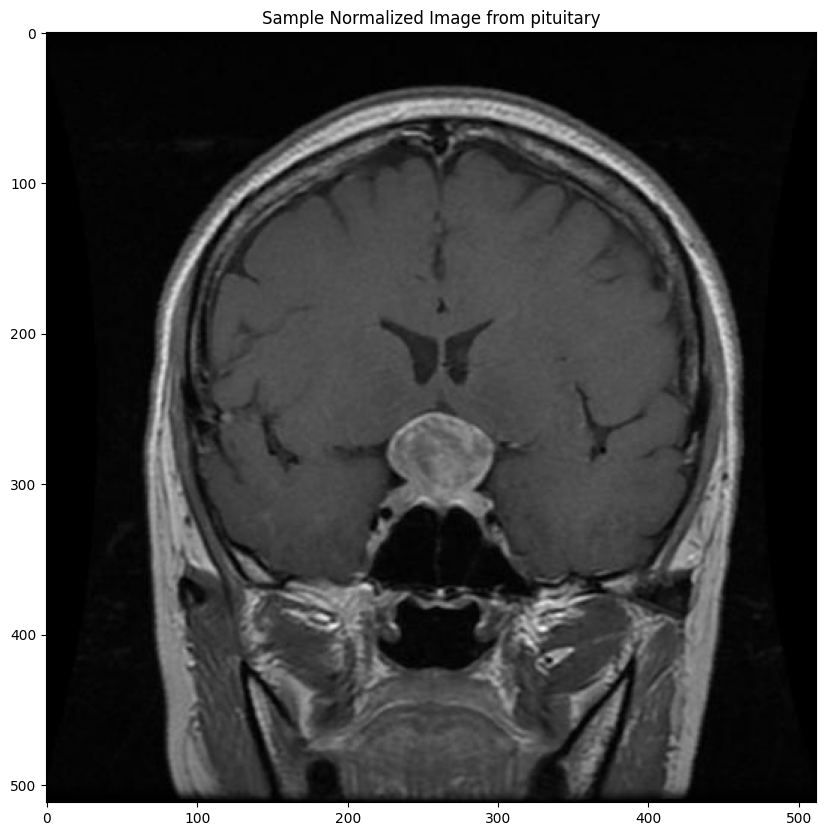

In [7]:
import os
import cv2
import numpy as np

# Directories
input_directory = r"/Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training"
output_directory = r"/Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training\NormalizedTesting"

# Ensure output directory exists and create subfolders
try:
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    # Create subfolders based on input directory contents
    for subfolder in os.listdir(input_directory):
        subfolder_path = os.path.join(output_directory, subfolder)
        if not os.path.exists(subfolder_path):
            os.makedirs(subfolder_path)
            print(f"Created subfolder: {subfolder_path}")

except OSError as e:
    print(f"Error creating directories: {e}")
    
    
# Function to normalize images
def normalize_image(image):
    return image / 255.0  # Normalize to range [0, 1]

# Iterate through each subfolder (class folder)
for class_folder in os.listdir(input_directory):
    class_input_path = os.path.join(input_directory, class_folder)
    class_output_path = os.path.join(output_directory, class_folder)

    if os.path.isdir(class_input_path):  # Ensure it's a directory
        for filename in os.listdir(class_input_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust for valid formats
                # Load image
                image_path = os.path.join(class_input_path, filename)
                image = cv2.imread(image_path)
                
                # Normalize image
                if image is not None:
                    normalized_image = normalize_image(image)
                    
                    # Save normalized image
                    output_path = os.path.join(class_output_path, filename.replace(".jpg", ".npy").replace(".png", ".npy"))
                    np.save(output_path, normalized_image)
                    print(f"Saved normalized image: {output_path}")
import os
import numpy as np
import matplotlib.pyplot as plt

# Verify the directory structure
print("Output Directory:", output_directory)
print("Existing directories:", os.listdir(output_directory))

# List all subdirectories to check what's actually there
for root, dirs, files in os.walk(output_directory):
    print(f"Root: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")

# Modify the code to be more robust
try:
    # List available classes/subdirectories
    available_classes = os.listdir(output_directory)
    print("Available classes:", available_classes)

    # Choose the first available class if "Glioma" is not found
    sample_class = "Glioma" if "Glioma" in available_classes else available_classes[0]
    
    # Full path to the class directory
    class_directory = os.path.join(output_directory, sample_class)
    
    # List files in the class directory
    sample_files = os.listdir(class_directory)
    print(f"Files in {sample_class} directory:", sample_files)
    
    # Pick the first file
    sample_file = sample_files[0]
    
    # Full path to the sample image
    sample_image_path = os.path.join(class_directory, sample_file)
    
    # Load the normalized image
    sample_image = np.load(sample_image_path)
    
    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(sample_image)
    plt.title(f"Sample Normalized Image from {sample_class}")
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


In [47]:
import tensorflow as tf
from tensorflow.keras import models

# Assuming your model is already defined as 'model'
# Example of a simple CNN model (modify with your actual model)
model = models.Sequential([
    # Example layers, replace with your model layers
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # For three classes (glioma, meningioma, pituitary)
])

# Plot the model architecture
tf.keras.utils.plot_model(model, show_shapes=True, dpi=70, to_file='model_architecture.png')

# This will save the model architecture plot as a PNG image named 'model_architecture.png' in your working directory.


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


/Users/talhaahmadkhan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# COUNT THE NUMBER OF FILES CHECKING, THE NUMBER OF IMAGES OR FILES IN THE TRAINING, VALIDATION, AND OUTPUT FOLDERS

In [8]:
import os

# Define paths for training, validation, and C:\Users\output directories
folder_path = r"/Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training\NormalizedTesting/glioma"
input_dir = r"/Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training\NormalizedTesting/glioma"
output_folder = r"/Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Output"

# Function to count files in a directory
def count_files_in_directory(directory):
    file_count = 0
    for root, dirs, files in os.walk(directory):
        file_count += len(files)
    return file_count

# Count files in training subfolders
print("Training Subfolder File Counts:")
try:
    for subfolder_name in os.listdir(input_dir):
        subfolder_path = os.path.join(input_dir, subfolder_name)
        if os.path.isdir(subfolder_path):
            subfolder_file_count = count_files_in_directory(subfolder_path)
            print(f"Total number of files in subfolder '{subfolder_name}' of training: {subfolder_file_count}")
except Exception as e:
    print(f"Error counting training files: {e}")

# Count files in validation subfolders
print("\nValidation Subfolder File Counts:")
try:
    for subfolder_name in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, subfolder_name)
        if os.path.isdir(subfolder_path):
            subfolder_file_count = count_files_in_directory(subfolder_path)
            print(f"Total number of files in subfolder '{subfolder_name}' of validation: {subfolder_file_count}")
except Exception as e:
    print(f"Error counting validation files: {e}")

# Count files in output folder subfolders
print("\nOutput Folder Subfolder File Counts:")
try:
    for folder_name in os.listdir(output_folder):
        folder_path = os.path.join(output_folder, folder_name)
        if os.path.isdir(folder_path):
            file_count = count_files_in_directory(folder_path)
            print(f"Total number of files in folder '{folder_name}': {file_count}")
except Exception as e:
    print(f"Error counting output folder files: {e}")

# Count total files in output folder
try:
    total_file_count = count_files_in_directory(output_folder)
    print(f"\nTotal number of files in the output folder: {total_file_count}")
except Exception as e:
    print(f"Error counting total files in output folder: {e}")

Training Subfolder File Counts:

Validation Subfolder File Counts:

Output Folder Subfolder File Counts:
Error counting output folder files: [Errno 2] No such file or directory: '/Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Output'

Total number of files in the output folder: 0


# DATA AUGUMENTATION


Data augmentation is used to artificially expand the size and variety of a dataset by applying transformations like rotation, flipping, zooming, and shifting to the existing images.

In [88]:


import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Paths
base_dir = "output\validation"  # Directory containing subfolders
output_dir = "TestingData"         # Directory for saving augmented images

# Target counts for each folder
TARGET_COUNTS = {
    "glioma": 319,        # No augmentation needed
    "meningioma": 319,     # Augment to reach 574 images
    "pituitary": 319,
    "notumor": 319     # Augment to reach 1140 images
}

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Image augmentation setup
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Function to augment images to the target count
def augment_images_to_target(input_dir, output_dir, target_count):
    class_name = os.path.basename(input_dir)
    output_class_dir = os.path.join(output_dir, class_name)

    # Ensure output subfolder exists
    if not os.path.exists(output_class_dir):
        os.makedirs(output_class_dir)

    # Copy existing images to the output directory
    current_images = [img for img in os.listdir(input_dir) if img.endswith((".png", ".jpg", ".jpeg"))]
    for img_name in current_images:
        src_path = os.path.join(input_dir, img_name)
        dest_path = os.path.join(output_class_dir, img_name)
        if not os.path.exists(dest_path):  # Avoid overwriting
            os.system(f'cp "{src_path}" "{dest_path}"')

    # Update the count of existing images
    current_count = len(os.listdir(output_class_dir))
    deficit = target_count - current_count

    if deficit <= 0:
        print(f"No augmentation needed for {class_name}. Current count: {current_count}")
        return

    print(f"Augmenting {class_name} with {deficit} images...")

    # Augment images
    augmented_count = 0
    while augmented_count < deficit:
        for img_name in current_images:
            if augmented_count >= deficit:
                break

            img_path = os.path.join(input_dir, img_name)
            img = load_img(img_path)
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)

            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_class_dir,
                                      save_prefix="aug", save_format="png"):
                augmented_count += 1
                if augmented_count >= deficit:
                    break

    print(f"Augmentation for {class_name} complete. Total images: {len(os.listdir(output_class_dir))}")

# Main process
# Augment each class folder based on the target counts
for folder_name, target_count in TARGET_COUNTS.items():
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.exists(folder_path):
        augment_images_to_target(folder_path, output_dir, target_count)
    else:
        print(f"Folder not found: {folder_name}")

print("Data augmentation process complete!")

Folder not found: glioma
Folder not found: meningioma
Folder not found: pituitary
Folder not found: notumor
Data augmentation process complete!


Data Splitting


# DATA SPLITTING

Data splitting helps in organizing and preparing data for machine learning tasks by ensuring a proper split between training and validation data, which is essential for model training and evaluation.

In [10]:
import os
import random
import shutil

def split_dataset(data_dir, output_dir, split_ratio=0.8):
    # Create output directories
    train_dir = os.path.join(output_dir, "output", "Training")
    val_dir = os.path.join(output_dir, "output", "validation")
    
    # Ensure directories exist
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    
    # Iterate over each class
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        
        # Verify it's a directory
        if not os.path.isdir(class_path):
            continue
        
        # Get all files in the class directory
        try:
            files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        except PermissionError:
            print(f"Permission denied for directory: {class_path}")
            continue
        
        # Shuffle files
        random.shuffle(files)
        
        # Calculate split index
        split_idx = int(len(files) * split_ratio)
        
        # Create class-specific train/val directories
        train_class_dir = os.path.join(train_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)
        
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)
        
        # Copy files with error handling
        for i, file in enumerate(files):
            src_path = os.path.join(class_path, file)
            
            try:
                # Determine destination based on split
                if i < split_idx:
                    dst_path = os.path.join(train_class_dir, file)
                else:
                    dst_path = os.path.join(val_class_dir, file)
                
                # Use copy2 to preserve metadata
                shutil.copy2(src_path, dst_path)
            
            except PermissionError:
                print(f"Permission denied for file: {src_path}")
            except FileNotFoundError:
                print(f"File not found: {src_path}")
            except Exception as e:
                print(f"Error copying {src_path}: {e}")
        
        print(f"Class '{class_name}': {split_idx} training files, {len(files) - split_idx} validation files")

# Directories
data_directory = r"/Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Testing"
output_directory = r"/Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training\NormalizedTesting"

# Run the function
split_dataset(data_directory, output_directory, split_ratio=0.8)


Class 'pituitary': 240 training files, 60 validation files
Class 'notumor': 324 training files, 81 validation files
Class 'glioma': 240 training files, 60 validation files
Class 'meningioma': 244 training files, 62 validation files


In [2]:
%pip install tensorflow
%pip install pydot


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf  # Import TensorFlow

# Define the feature extractor model (VGG19 for example)
feature_extractor = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = tf.keras.Model(inputs=feature_extractor.input, outputs=tf.keras.layers.Flatten()(feature_extractor.output))

# Plot the model
tf.keras.utils.plot_model(feature_extractor, show_shapes=True, dpi=70, to_file="feature_extractor_model.png")


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


Verifying the images in a directory and checking their shapes (height, width, and number of color channels)

In [11]:
import cv2
import os

# Directory containing the images
image_dir = r"/Users/talhaahmadkhan/Desktop/Brain Tumor Detection/Training\NormalizedTesting/output/Training/glioma"

# Iterate through each image file
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)
        
        # Check the shape of the image
        if image is not None:
            print(f"Image: {filename}, Shape: {image.shape}")
        else:
            print(f"Failed to load image: {filename}")


Image: Te-gl_0284.jpg, Shape: (512, 512, 3)
Image: Te-gl_0290.jpg, Shape: (512, 512, 3)
Image: Te-gl_0247.jpg, Shape: (512, 512, 3)
Image: Te-gl_0253.jpg, Shape: (512, 512, 3)
Image: Te-gl_0086.jpg, Shape: (512, 512, 3)
Image: Te-gl_0092.jpg, Shape: (512, 512, 3)
Image: Te-gl_0045.jpg, Shape: (512, 512, 3)
Image: Te-gl_0051.jpg, Shape: (512, 512, 3)
Image: Te-gl_0079.jpg, Shape: (512, 512, 3)
Image: Te-gl_0131.jpg, Shape: (512, 512, 3)
Image: Te-gl_0125.jpg, Shape: (512, 512, 3)
Image: Te-gl_0119.jpg, Shape: (512, 512, 3)
Image: Te-gl_0118.jpg, Shape: (512, 512, 3)
Image: Te-gl_0124.jpg, Shape: (512, 512, 3)
Image: Te-gl_0130.jpg, Shape: (512, 512, 3)
Image: Te-gl_0078.jpg, Shape: (512, 512, 3)
Image: Te-gl_0050.jpg, Shape: (512, 512, 3)
Image: Te-gl_0044.jpg, Shape: (512, 512, 3)
Image: Te-gl_0093.jpg, Shape: (512, 512, 3)
Image: Te-gl_0087.jpg, Shape: (512, 512, 3)
Image: Te-gl_0246.jpg, Shape: (512, 512, 3)
Image: Te-gl_0291.jpg, Shape: (512, 512, 3)
Image: Te-gl_0285.jpg, Shape: (5

# DATA PREPARATION ,FEATURE EXTRACTION ,FEATURE SELECTION ,MODEL TRAINING ,MODEL EVALUATION.

The code builds an image classification pipeline for brain tumor detection using a combination of VGG19 "Pre-trained CNN"
 (for feature extraction), SVM (for classification), and RFECV (for feature selection). The pipeline includes data preparation, feature extraction, feature selection, model training, and evaluation. By using pre-trained deep learning models and effective feature selection techniques, this code aims to build an accurate and efficient brain tumor classifier.

1.VGG19:
It's a powerful pre-trained model, saving time and computational resources while still providing excellent features for image classification tasks. Using transfer learning helps leverage existing knowledge from the ImageNet dataset to perform better on smaller datasets like brain tumor images.



2.RFECV:
This method ensures that only the most relevant features are passed to the SVM, improving the model's efficiency, reducing overfitting, and enhancing the generalization ability of the classifier.


3.SVM:
SVMs work well for small to medium-sized datasets and are efficient in handling high-dimensional data. By applying feature extraction with VGG19 and feature selection with RFECV, the SVM classifier can achieve high performance on this task.

Found 1264 images belonging to 4 classes.
Found 479 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Extracting features using VGG19...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━

Training Accuracy: 100.00%
Validation Accuracy: 98.33%
Models saved to feature_extractor_vgg19.h5, rfecv_selector.pkl, and svm_model.pkl
Evaluating the model...
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       300
           1       0.99      0.99      0.99       306
           2       1.00      1.00      1.00       405
           3       0.99      1.00      1.00       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



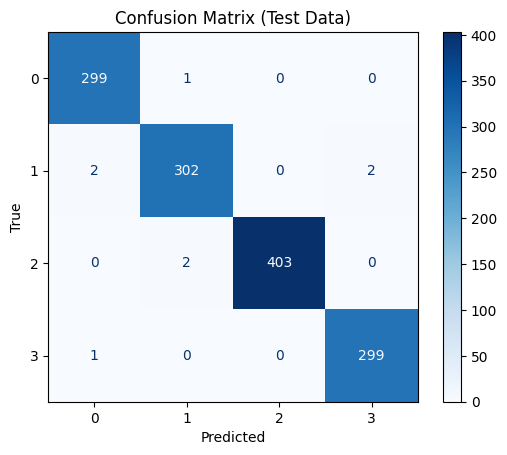

Test Accuracy: 99.39%


In [11]:
import numpy as np
import joblib
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt

class BrainTumorClassifier:
    def __init__(self, train_dir, val_dir, test_dir, img_size=(224, 224), batch_size=32):
        self.train_dir = train_dir
        self.val_dir = val_dir
        self.test_dir = test_dir
        self.img_size = img_size
        self.batch_size = batch_size
        self.train_generator = None
        self.val_generator = None
        self.test_generator = None
        self.feature_extractor = None
        self.svm_model = None
        self.rfecv_selector = None  # For saving RFECV selector
        self.history = None

    def create_data_generators(self):
        # Data generators for training, validation, and testing
        train_datagen = ImageDataGenerator(rescale=1./255)
        val_test_datagen = ImageDataGenerator(rescale=1./255)

        self.train_generator = train_datagen.flow_from_directory(
            self.train_dir, target_size=self.img_size, batch_size=self.batch_size, class_mode='categorical'
        )

        self.val_generator = val_test_datagen.flow_from_directory(
            self.val_dir, target_size=self.img_size, batch_size=self.batch_size, class_mode='categorical'
        )

        self.test_generator = val_test_datagen.flow_from_directory(
            self.test_dir, target_size=self.img_size, batch_size=self.batch_size, class_mode='categorical', shuffle=False
        )

    def extract_features(self, data_generator):
        # Extract features from images using VGG19 pre-trained model
        print("Extracting features using VGG19...")
        base_model = VGG19(weights='imagenet', include_top=False, input_shape=(*self.img_size, 3))
        self.feature_extractor = Model(inputs=base_model.input, outputs=Flatten()(base_model.output))

        features, labels = [], []
        for i, (x_batch, y_batch) in enumerate(data_generator):
            feature_batch = self.feature_extractor.predict(x_batch)
            features.append(feature_batch)
            labels.append(y_batch)
            if i >= len(data_generator) - 1:
                break

        return np.vstack(features), np.vstack(labels)

    def perform_feature_selection_rfecv(self, X_train, y_train, X_val=None, X_test=None):
        # Feature selection using RFECV (Recursive Feature Elimination with Cross-Validation)
        print("Performing feature selection using RFECV...")
        y_train = np.argmax(y_train, axis=1)  # Convert one-hot labels to integers

        estimator = SVC(kernel="linear")
        self.rfecv_selector = RFECV(estimator, step=0.1, cv=5, scoring='accuracy', verbose=1)
        self.rfecv_selector.fit(X_train, y_train)

        X_train_selected = self.rfecv_selector.transform(X_train)
        X_val_selected = self.rfecv_selector.transform(X_val) if X_val is not None else None
        X_test_selected = self.rfecv_selector.transform(X_test) if X_test is not None else None

        print(f"Original training features: {X_train.shape}")
        print(f"Reduced training features: {X_train_selected.shape}")
        
        return X_train_selected, X_val_selected, X_test_selected

    def build_and_train_svm(self, X_train, y_train, X_val, y_val):
        # Train the SVM classifier
        print("Training SVM classifier...")
        y_train = np.argmax(y_train, axis=1)
        y_val = np.argmax(y_val, axis=1)

        svm = SVC(kernel='linear', probability=True)
        svm.fit(X_train, y_train)

        # Calculate accuracy for both training and validation sets
        train_accuracy = accuracy_score(y_train, svm.predict(X_train)) * 100
        val_accuracy = accuracy_score(y_val, svm.predict(X_val)) * 100

        print(f"Training Accuracy: {train_accuracy:.2f}%")
        print(f"Validation Accuracy: {val_accuracy:.2f}%")
        
        return svm, train_accuracy, val_accuracy

    def save_models(self, feature_extractor_filename, rfecv_filename, svm_filename):
        # Save the feature extractor (VGG19 model), RFECV selector, and SVM model
        self.feature_extractor.save(feature_extractor_filename)
        joblib.dump(self.rfecv_selector, rfecv_filename)
        joblib.dump(self.svm_model, svm_filename)
        print(f"Models saved to {feature_extractor_filename}, {rfecv_filename}, and {svm_filename}")

    def load_models(self, feature_extractor_filename, rfecv_filename, svm_filename):
        # Load the saved feature extractor (VGG19 model), RFECV selector, and SVM model
        try:
            self.feature_extractor = load_model(feature_extractor_filename)
            self.rfecv_selector = joblib.load(rfecv_filename)
            self.svm_model = joblib.load(svm_filename)
            print(f"Models loaded from {feature_extractor_filename}, {rfecv_filename}, and {svm_filename}")
        except Exception as e:
            print(f"Error loading models: {e}")

    def evaluate(self, model, X_test, y_test, X_val, y_val):
        # Evaluate the classifier model
        print("Evaluating the model...")
        y_test = np.argmax(y_test, axis=1)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) * 100

        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # Confusion Matrix for Test Data
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
        disp.plot(cmap='Blues', values_format='d')
        plt.title('Confusion Matrix (Test Data)')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        print(f"Test Accuracy: {accuracy:.2f}%")
        return accuracy

def main():
    # Define the directories for training, validation, and testing
    train_dir = r"Training\NormalizedTesting/output/Training"
    val_dir = r"Training\NormalizedTesting/output/validation"
    test_dir = r"Testing"

    # Initialize and use the BrainTumorClassifier
    classifier = BrainTumorClassifier(train_dir, val_dir, test_dir)

    # Step 1: Data Preparation
    classifier.create_data_generators()

    # Step 2: Feature Extraction
    X_train, y_train = classifier.extract_features(classifier.train_generator)
    X_val, y_val = classifier.extract_features(classifier.val_generator)
    X_test, y_test = classifier.extract_features(classifier.test_generator)

    # Step 3: Feature Selection using RFECV
    X_train_selected, X_val_selected, X_test_selected = classifier.perform_feature_selection_rfecv(
        X_train, y_train, X_val, X_test
    )

    # Step 4: Train SVM Classifier
    svm_model, train_accuracy, val_accuracy = classifier.build_and_train_svm(X_train_selected, y_train, X_val_selected, y_val)

    # Step 5: Save the models
    classifier.svm_model = svm_model  # Assign trained model to classifier object for saving
    classifier.save_models('feature_extractor_vgg19.h5', 'rfecv_selector.pkl', 'svm_model.pkl')

    # Step 6: Evaluate Model
    test_accuracy = classifier.evaluate(svm_model, X_test_selected, y_test, X_val_selected, y_val)

if __name__ == "__main__":
    main()


# EVALUATING AND VISUALIZING THE PERFORMANCE

Found 1264 images belonging to 4 classes.
Found 479 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 

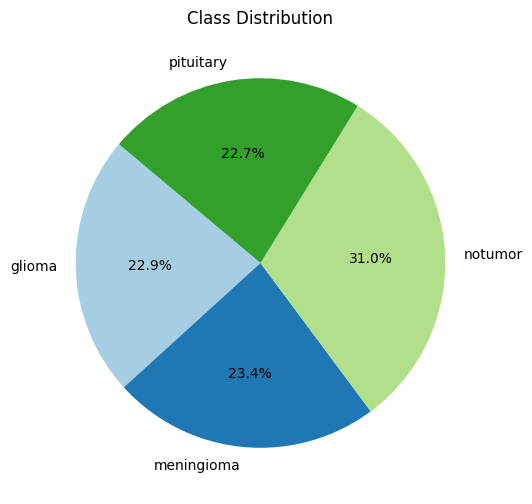

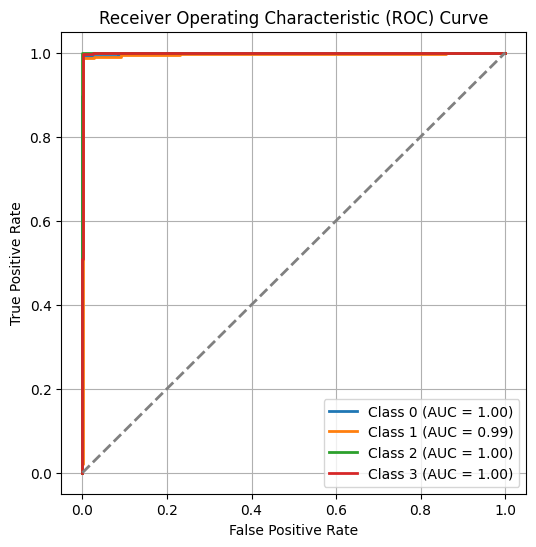

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from joblib import load
from tensorflow.keras.models import load_model

# Step 1: Initialize directories
train_dir = r"Training\NormalizedTesting/output/Training"
val_dir = r"Training\NormalizedTesting/output/validation"
test_dir = r"Testing"

# Step 2: Recreate Data Generators
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical"
)
val_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical"
)
test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode="categorical", shuffle=False
)

# Step 3: Load pre-trained models
feature_extractor_filename = "feature_extractor_vgg19.h5"
rfecv_filename = "rfecv_selector.pkl"
svm_filename = "svm_model.pkl"

feature_extractor = load_model(feature_extractor_filename)
rfecv_selector = load(rfecv_filename)
svm_model = load(svm_filename)

# Step 4: Extract features for test data
def extract_features(generator, feature_extractor):
    features, labels = [], []
    for i, (x_batch, y_batch) in enumerate(generator):
        feature_batch = feature_extractor.predict(x_batch)
        features.append(feature_batch)
        labels.append(y_batch)
        if i >= len(generator) - 1:
            break
    return np.vstack(features), np.vstack(labels)

X_test, y_test = extract_features(test_generator, feature_extractor)
X_test_selected = rfecv_selector.transform(X_test)

# Step 5: Visualization Functions
def plot_class_distribution(generator):
    class_counts = generator.class_indices
    labels = list(class_counts.keys())
    samples_per_class = [generator.labels.tolist().count(i) for i in range(len(labels))]

    plt.figure(figsize=(6, 6))  # Reduced size of pie chart
    plt.pie(samples_per_class, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('Class Distribution')
    plt.show()


def plot_roc_curve(model, X_test, y_test):
    # One-vs-Rest (OvR) approach for multiclass ROC
    n_classes = y_test.shape[1]
    y_test_binary = y_test  # Assuming y_test is already one-hot encoded
    y_score = model.decision_function(X_test)  # Decision scores for all classes

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute ROC curve and AUC for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves for each class
    plt.figure(figsize=(6, 6))  # Reduced size of ROC curve plot
    for i in range(n_classes):
        plt.plot(
            fpr[i],
            tpr[i],
            lw=2,
            label=f"Class {i} (AUC = {roc_auc[i]:.2f})"
        )

    # Plot diagonal line (random classifier)
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2)

    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Step 6: Run Visualizations
if __name__ == "__main__":
    # Plot Class Distribution (Pie Chart)
    plot_class_distribution(train_generator)

    # Compute Confusion Matrix and plot Bar Chart
    y_test_actual = np.argmax(y_test, axis=1)
    y_test_predicted = svm_model.predict(X_test_selected)
    class_names = list(train_generator.class_indices.keys())  # Get class names
    

    # Plot ROC Curve
    plot_roc_curve(svm_model, X_test_selected, y_test)


# GRAD-CAM (Gradient-weighted Class Activation Mapping)

It help in visualize the areas of an image that are most influential in a model's decision-making using the Grad-CAM technique. It can be particularly useful in domains where understanding the reasoning behind a model’s prediction is crucial, such as in medical diagnoses using image-based data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


/Users/talhaahmadkhan/Library/Python/3.9/lib/python/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_2']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


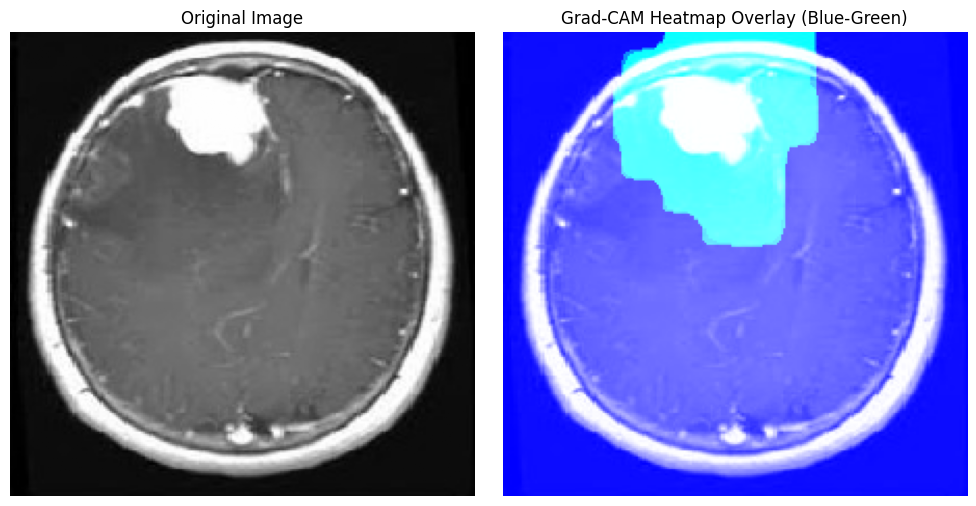

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
from PIL import Image
import joblib
from tensorflow.image import resize

# Load the models
vgg19_model = load_model('feature_extractor_vgg19.h5')  # Load your VGG19 model
svm_model = joblib.load('svm_model.pkl')  # Load your SVM model
rfecv_selector = joblib.load('rfecv_selector.pkl')  # Load your RFECV model

# Load and preprocess the image
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg19.preprocess_input(img_array)
    return img_array

# Function to generate Grad-CAM heatmap
def generate_gradcam_heatmap(model, image_array, layer_name, class_index):
    preds = model.predict(image_array)
    top_class = preds[0].argmax() if class_index is None else class_index

    grad_model = tf.keras.models.Model([model.input], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(image_array)
        class_output = preds[0][top_class]

    grads = tape.gradient(class_output, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(1, 2))
    pooled_grads = tf.squeeze(pooled_grads)

    conv_layer_output_value = last_conv_layer_output[0].numpy()
    pooled_grads = tf.reshape(pooled_grads, (1, 1, conv_layer_output_value.shape[-1]))

    conv_layer_output_value *= pooled_grads.numpy()

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) if np.max(heatmap) > 0 else 1

    return heatmap

# Function to overlay heatmap on original image with blue-green colors
def overlay_heatmap(original, heatmap, alpha=0.5):
    heatmap_resized = np.uint8(255 * heatmap)
    heatmap_resized = np.squeeze(heatmap_resized)

    # Use the 'winter' colormap (blue-green gradient)
    cmap = plt.get_cmap('winter')
    heatmap_colored = cmap(heatmap_resized / 255.0)[:, :, :3]  # Get the RGB values
    heatmap_colored = np.array(heatmap_colored * 255, dtype=np.uint8)

    heatmap_colored = np.array(Image.fromarray(heatmap_colored).resize((original.shape[1], original.shape[0])))
    return np.clip(original + heatmap_colored * alpha, 0, 1)

# Main code
image_path = r'Training\NormalizedTesting/output/Training/meningioma/Te-meTr_0008.jpg'  # Update with your image path
image_array = load_and_preprocess_image(image_path)

# Generate Grad-CAM heatmap
layer_name = 'block5_conv4'  # Last convolutional layer
heatmap_gradcam = generate_gradcam_heatmap(vgg19_model, image_array, layer_name, None)

# Load original image for display
original_image = img_to_array(load_img(image_path, target_size=(224, 224))) / 255.0

# Overlay heatmap on the original image
blended_image_gradcam = overlay_heatmap(original_image, heatmap_gradcam)

# Plot original image and Grad-CAM heatmap overlay
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blended_image_gradcam)
plt.title('Grad-CAM Heatmap Overlay (Blue-Green)')
plt.axis('off')

plt.tight_layout()
plt.show()


# Visualizing the interpretability of DEEP LEARNING models using Grad-CAM and GRAD-CAM++ techniques

It load a pre-trained VGG19 model, apply Grad-CAM and Grad-CAM++ techniques to generate heatmaps for image classification, and then overlay these heatmaps onto the original image. The main goal is to visualize which areas of an image contribute the most to the model's decision, providing interpretability to the model’s prediction.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Error: Second gradients could not be computed.


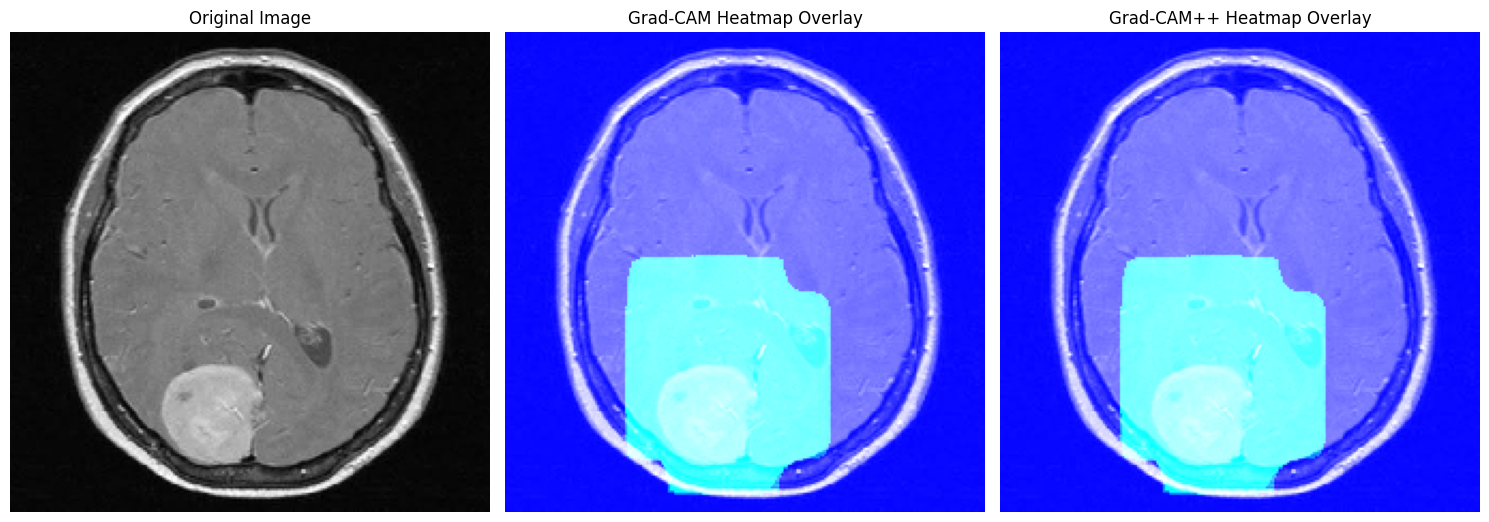

SVM Prediction: [1]


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
from PIL import Image
import joblib

# Load the models
vgg19_model = load_model('feature_extractor_vgg19.h5')  # Load your VGG19 model
svm_model = joblib.load('svm_model.pkl')  # Load your SVM model
rfecv_selector = joblib.load('rfecv_selector.pkl')  # Load your RFECV model

# Load and preprocess the image
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg19.preprocess_input(img_array)
    return img_array

# Function to generate Grad-CAM heatmap
def generate_gradcam_heatmap(model, image_array, layer_name, class_index):
    preds = model.predict(image_array)
    top_class = preds[0].argmax() if class_index is None else class_index

    grad_model = tf.keras.models.Model([model.input], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(image_array)
        class_output = preds[0][top_class]

    grads = tape.gradient(class_output, last_conv_layer_output)

    pooled_grads = tf.reduce_mean(grads, axis=(1, 2))
    pooled_grads = tf.squeeze(pooled_grads)

    conv_layer_output_value = last_conv_layer_output[0].numpy()
    pooled_grads = tf.reshape(pooled_grads, (1, 1, 512))

    conv_layer_output_value *= pooled_grads.numpy()

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) if np.max(heatmap) > 0 else 1

    return heatmap

# Function to generate Grad-CAM++ heatmap with reshaping and error handling
def generate_gradcam_plus_plus(model, image_array, layer_name, class_index):
    preds = model.predict(image_array)
    top_class = preds[0].argmax() if class_index is None else class_index

    grad_model = tf.keras.models.Model([model.input], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape(persistent=True) as tape:
        last_conv_layer_output, preds = grad_model(image_array)
        class_output = preds[0][top_class]

    grads = tape.gradient(class_output, last_conv_layer_output)
    
    # Check if gradients were calculated
    if grads is None:
        print("Error: Gradients for the class output could not be computed.")
        return np.zeros(last_conv_layer_output.shape[1:3])  # Return a zero heatmap as fallback

    second_grads = tape.gradient(grads, last_conv_layer_output)

    # Check if second gradients were calculated
    if second_grads is None:
        print("Error: Second gradients could not be computed.")
        second_grads = tf.zeros_like(grads)  # Use zero gradients if second gradients are unavailable

    pooled_grads = tf.reduce_mean(grads, axis=(1, 2))
    pooled_second_grads = tf.reduce_mean(second_grads, axis=(1, 2))

    conv_layer_output_value = last_conv_layer_output[0].numpy()
    
    # Safeguard against invalid gradients
    weights = tf.nn.relu(pooled_grads) / (tf.nn.relu(pooled_grads) + tf.nn.relu(pooled_second_grads) + tf.keras.backend.epsilon())

    # Reshape weights to match the dimensions of the conv_layer_output_value
    weights = tf.reshape(weights, (1, 1, -1))  # Make sure weights are reshaped for proper multiplication

    heatmap = np.zeros((conv_layer_output_value.shape[0], conv_layer_output_value.shape[1]))

    # Loop through the channels of the convolutional layer output
    for i in range(conv_layer_output_value.shape[-1]):
        heatmap += weights[0, 0, i] * conv_layer_output_value[:, :, i]

    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap) if np.max(heatmap) > 0 else 1

    return heatmap

# Function to overlay heatmap on original image with bluish colors
def overlay_heatmap(original, heatmap, alpha=0.5):
    heatmap_resized = np.uint8(255 * heatmap)
    heatmap_resized = np.squeeze(heatmap_resized)

    # Create a custom colormap
    cmap = plt.get_cmap('winter')  # Using the 'cool' colormap, which is more bluish
    heatmap_colored = cmap(heatmap_resized / 255.0)[:, :, :3]  # Get the RGB values
    heatmap_colored = np.array(heatmap_colored * 255, dtype=np.uint8)

    heatmap_colored = np.array(Image.fromarray(heatmap_colored).resize((original.shape[1], original.shape[0])))
    return np.clip(original + heatmap_colored * alpha, 0, 1)



# Main code
image_path = r'Training\NormalizedTesting/output/Training/meningioma/Te-me_0010.jpg'  # Update with your image path
image_array = load_and_preprocess_image(image_path)

# Generate heatmaps
layer_name = 'block5_conv4'  # Last convolutional layer
heatmap_gradcam = generate_gradcam_heatmap(vgg19_model, image_array, layer_name, None)
heatmap_gradcam_plus_plus = generate_gradcam_plus_plus(vgg19_model, image_array, layer_name, None)

# Load original image for display
original_image = img_to_array(load_img(image_path, target_size=(224, 224))) / 255.0

# Overlay heatmaps on the original image
blended_image_gradcam = overlay_heatmap(original_image, heatmap_gradcam)
blended_image_gradcam_plus_plus = overlay_heatmap(original_image, heatmap_gradcam_plus_plus)

# Plot original image and blended images
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blended_image_gradcam)
plt.title('Grad-CAM Heatmap Overlay')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blended_image_gradcam_plus_plus)
plt.title('Grad-CAM++ Heatmap Overlay')
plt.axis('off')

plt.tight_layout()
plt.show()

# Apply SVM and RFECV for feature selection (if needed)
def explain_svm_with_rfecv(X):
    selected_features = rfecv_selector.transform(X)
    predictions = svm_model.predict(selected_features)
    return predictions

# Sample feature vector for SVM prediction
X_sample = np.random.rand(1, 25088)  # Placeholder for feature vector
svm_predictions = explain_svm_with_rfecv(X_sample)
print(f"SVM Prediction: {svm_predictions}")
